In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# format display settings
pd.set_option('display.max_columns', None)

In [2]:
# Generate sample data
np.random.seed(42)

# sales dataset
sales_data = pd.DataFrame({
    'Date': pd.date_range(start='2025-01-01', periods=500),
    'TransactionID': np.arange(1001, 1501),
    'MenuItem': np.random.choice(['Burger','Taco','Wrap','Drink','Fries'], 500),
    'Price': np.random.uniform(4.0, 12.0, 500).round(2),
    'Quantity': np.random.randint(1,5, 500),
    'CustomerAge': np.random.choice(np.arange(18,70), 500),
    'CustomerGender': np.random.choice(['Male','Female','Other'], 500),
    'HourOfDay': np.random.choice(np.arange(8, 23), 500)
})

# calculate revenue
sales_data['TotalRevenue'] = sales_data['Price'] * sales_data['Quantity']

# menu cost structure
menu_costs = pd.DataFrame({
    'MenuItem': ['Burger','Taco','Wrap','Drink','Fries'],
    'CostPrice': [2.5, 2.0, 2.8, 1.0, 1.2]
})

sales_data = sales_data.merge(menu_costs, on='MenuItem')
sales_data['Profit'] = sales_data['TotalRevenue'] - (sales_data['CostPrice'] * sales_data['Quantity'])

In [3]:
total_revenue = sales_data['TotalRevenue'].sum()
total_transactions = sales_data.shape[0]
avg_check_size = sales_data['TotalRevenue'].mean()

total_revenue, total_transactions, avg_check_size

(np.float64(9406.14), 500, np.float64(18.812279999999998))

In [4]:
menu_perf = sales_data.groupby('MenuItem').agg({
    'Quantity': 'sum',
    'TotalRevenue': 'sum',
    'Profit': 'sum'
}).sort_values(by='Quantity', ascending=False)

menu_perf

,Quantity,TotalRevenue,Profit
MenuItem,,,
Burger,283,2142.65,1435.15
Drink,267,2185.90,1918.90
Fries,220,1765.04,1501.04
Taco,216,1761.88,1329.88
Wrap,208,1550.67,968.27


In [5]:
sales_data['FoodCostPct'] = (sales_data['CostPrice'] * sales_data['Quantity']) / sales_data['TotalRevenue'] * 100
sales_data[['MenuItem','TotalRevenue','FoodCostPct']].head()

,MenuItem,TotalRevenue,FoodCostPct
0,Drink,8.04,12.437811
1,Fries,31.83,11.310085
2,Wrap,26.24,42.682927
3,Fries,11.16,10.752688
4,Fries,28.44,16.877637


In [6]:
seats = 20  # e.g., number of serving meals simultaneously
hours_open = 12

revpash = sales_data['TotalRevenue'].sum() / (seats * hours_open)
revpash

np.float64(39.192249999999994)

In [7]:
staff_data = pd.DataFrame({
    'EmployeeID': [f"E{100+i}" for i in range(10)],
    'HoursWorked': np.random.randint(20,50,10),
    'HourlyWage': np.random.uniform(9.5, 14.0, 10)
})

staff_data['StaffCost'] = staff_data['HoursWorked'] * staff_data['HourlyWage']
sales_data['TotalStaffCost'] = staff_data['StaffCost'].sum()

staff_data

,EmployeeID,HoursWorked,HourlyWage,StaffCost
0,E100,34,13.424611,456.436762
1,E101,27,11.951815,322.699003
2,E102,25,12.912913,322.822815
3,E103,47,12.893485,605.993774
4,E104,46,9.580756,440.714755
5,E105,29,10.068142,291.976119
6,E106,22,12.468332,274.303307
7,E107,38,10.227289,388.636988
8,E108,36,10.649720,383.389922
9,E109,26,13.759871,357.756641


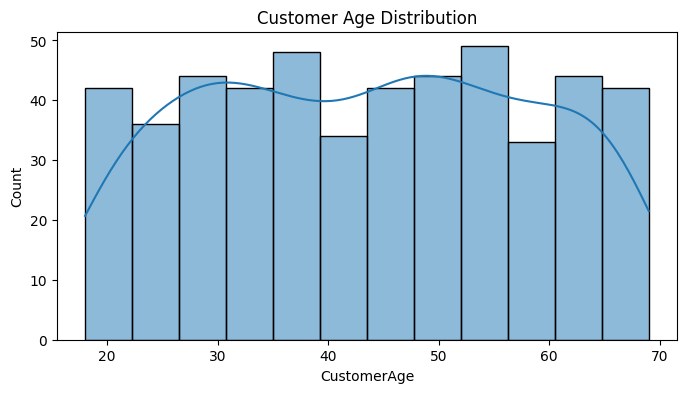

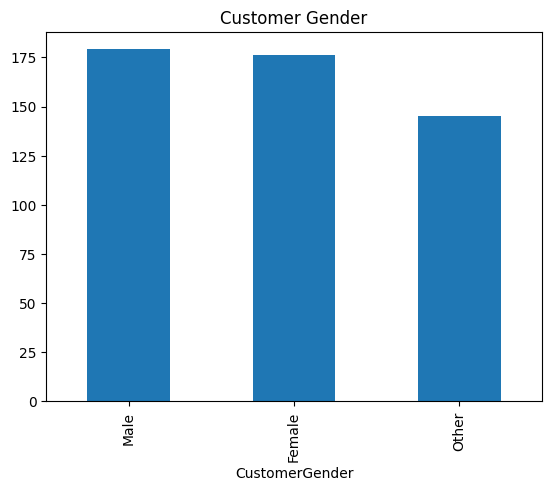

In [8]:
plt.figure(figsize=(8,4))
sns.histplot(sales_data['CustomerAge'], bins=12, kde=True)
plt.title('Customer Age Distribution')
plt.show()

sales_data['CustomerGender'].value_counts().plot(kind='bar')
plt.title('Customer Gender')
plt.show()

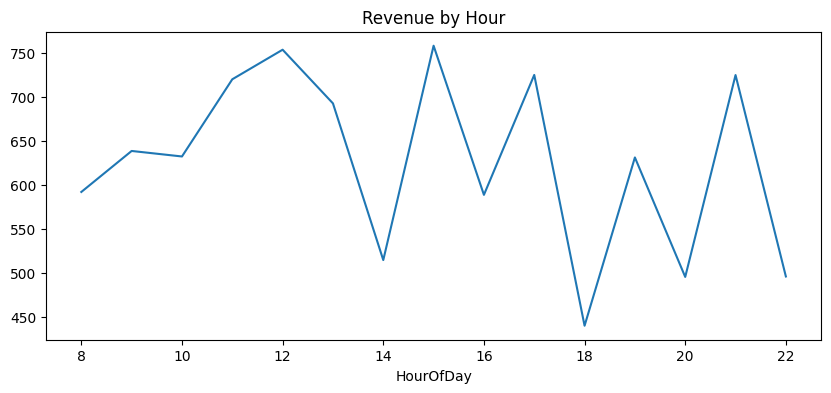

In [9]:
hourly_sales = sales_data.groupby('HourOfDay')['TotalRevenue'].sum()

plt.figure(figsize=(10,4))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values)
plt.title('Revenue by Hour')
plt.show()

In [10]:
feedback_data = pd.DataFrame({
    'TransactionID': sales_data['TransactionID'],
    'Rating': np.random.choice([1,2,3,4,5], 500, p=[0.05,0.10,0.20,0.35,0.30]),
})

avg_rating = feedback_data['Rating'].mean()
avg_rating

np.float64(3.708)